In [3]:
# Technical Analysis in Python

## Importando las librerías

import pandas as pd
import yfinance as yf
import cufflinks as cf
import backtrader as bt
from datetime import datetime
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode

## Descargando la data

df_twtr = yf.download('TWTR', start = '2018-01-01', 
                     end = '2020-04-16', progress = False, 
                     auto_adjust = True)


## Creando el gráfico de velas

qf = cf.QuantFig(df_twtr, title = "Gráfico de precios de Twitter",
                legend = 'top', name = 'TWTR')

## Añadir volumen
qf.add_volume()

## Añadir promedios móviles
qf.add_ema(periods = 20, column = 'Close', color = 'red')
qf.add_ema(periods = 50, column = 'Close', color = 'blue')
qf.add_ema(periods = 200, column = 'Close', color = 'orange')

qf.iplot()

In [ ]:
# Backtesting de una estrategia basada en un SMA

## Definición de una clase que representa la estrategia de trading

class SmaSignal(bt.Signal): 
    params = (('period', 20), ) 
    def __init__(self):
        self.lines.signal = self.data - bt.ind.SMA(period=self.p.period)
        
## Descargando la data

data = bt.feeds.YahooFinanceCSVData(dataname='AAPL.csv',
                                    fromdate=datetime(2018, 1, 1),
                                    todate=datetime(2018, 12, 31))

## Configuración del backtest

cerebro = bt.Cerebro(stdstats = False) 
cerebro.adddata(data)
cerebro.broker.setcash(1000.0) 
cerebro.add_signal(bt.SIGNAL_LONG, SmaSignal) 
cerebro.addobserver(bt.observers.BuySell) 
cerebro.addobserver(bt.observers.Value)

## Ejecutando el backtest

print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}') 
cerebro.run()
print(f'Final Portfolio Value: {cerebro.broker.getvalue():.2f}')
cerebro.plot(iplot=True, volume=False)

Starting Portfolio Value: 1000.00
2018-02-14, BUY CREATED --- Price: 162.73
2018-02-15, BUY EXECUTED --- Price:165.08, Cost: 165.08, Commission: 0.00
Final Portfolio Value: 988.47


<IPython.core.display.Javascript object>


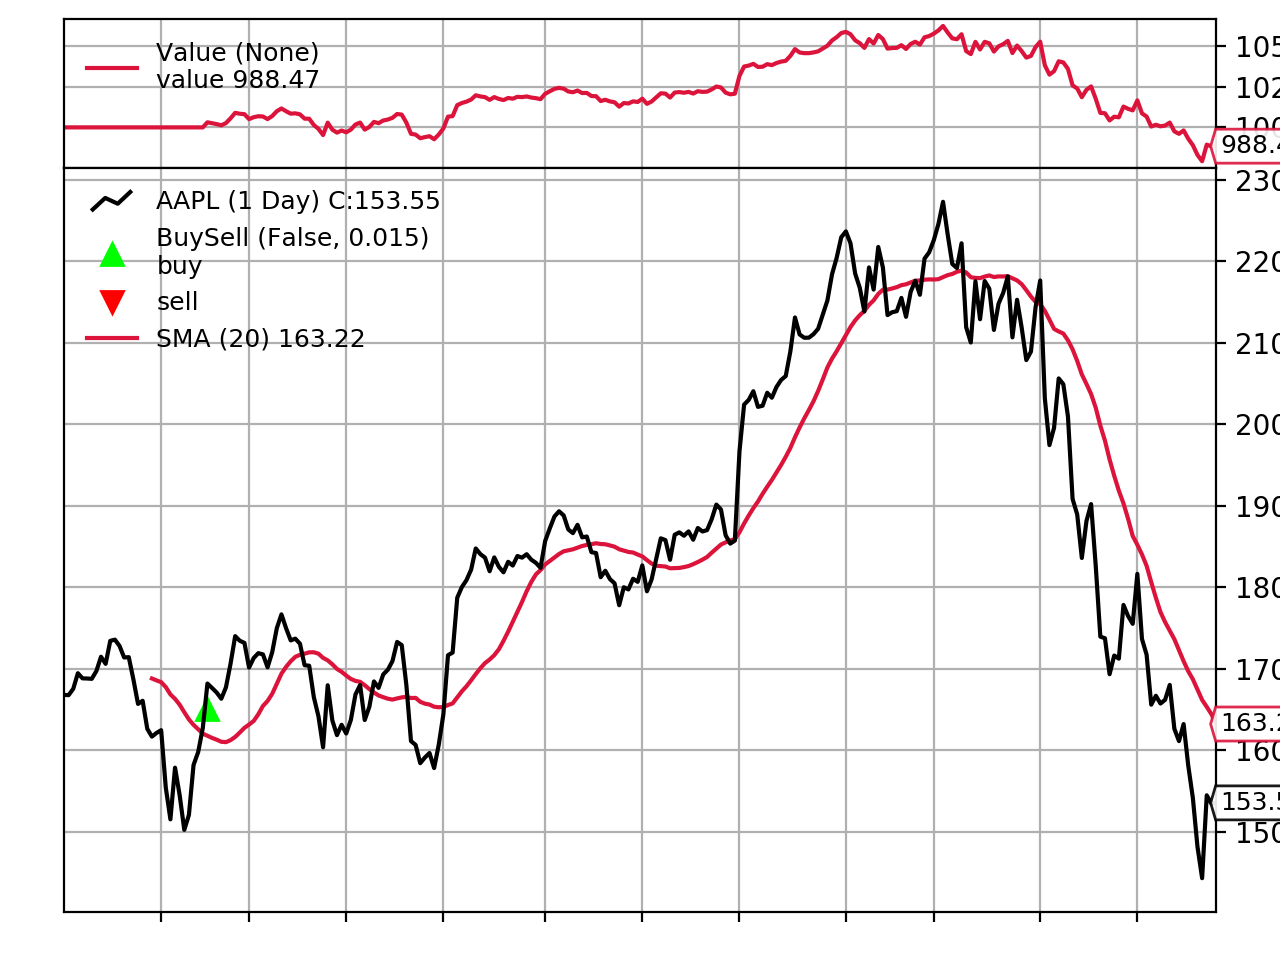

[[<Figure size 640x480 with 2 Axes>]]

In [2]:
import pandas as pd
import yfinance as yf
import cufflinks as cf
import backtrader as bt
from datetime import datetime
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode

class SmaStrategy(bt.Strategy): 
    params = (('ma_period', 20), )
    
    def __init__(self):
        self.data_close = self.datas[0].close
        
        self.order = None 
        self.price = None 
        self.comm = None
        
        self.sma = bt.ind.SMA(self.datas[0], period=self.params.ma_period)
        
    
    def log(self, txt):
        dt = self.datas[0].datetime.date(0).isoformat() 
        print(f'{dt}, {txt}')
    
    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return
       
        if order.status in [order.Completed]: 
            if order.isbuy():
                self.log(f'BUY EXECUTED --- Price:{order.executed.price:.2f}, Cost: {order.executed.value:.2f}, Commission: {order.executed.comm:.2f}' )
                self.price = order.executed.price
                self.comm = order.executed.comm 
            else:
                self.log(f'SELL EXECUTED --- Price:{order.executed.price:.2f},Cost: {order.executed.value:.2f},Commission: {order.executed.comm:.2f}')
                         
                self.bar_executed = len(self)
        
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
                         self.log('Order Failed') 
                         self.order = None
    
    
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        self.log(f'OPERATION RESULT --- Gross: {trade.pnl:.2f}, Net: {trade.pnlcomm:.2f}')
    
    
    def next(self):
        if self.order:
            return
        
        if not self.position:
            if self.data_close[0] > self.sma[0]:
                self.log(f'BUY CREATED --- Price: {self.data_close[0]:.2f}')
                self.order = self.buy()
        else:
            if self.data_close[0] < self.sma[0]:
                self.log(f'SELL CREATED --- Price:{self.data_close[0]:.2f}')
                self.order = self.sell()
                         
                         
data = bt.feeds.YahooFinanceCSVData(dataname='AAPL.csv',
                                    fromdate=datetime(2018, 1, 1),
                                    todate=datetime(2018, 12, 31))
                         
                         
cerebro = bt.Cerebro(stdstats = False)
cerebro.adddata(data) 
cerebro.broker.setcash(1000.0)
cerebro.addstrategy(SmaStrategy) 
cerebro.addobserver(bt.observers.BuySell) 
cerebro.addobserver(bt.observers.Value)
                         
print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}') 
cerebro.run()
print(f'Final Portfolio Value: {cerebro.broker.getvalue():.2f}')
                         
cerebro.plot(iplot=True, volume=False)

In [1]:
import pandas as pd
import yfinance as yf
import cufflinks as cf
import backtrader as bt
from datetime import datetime
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode

class SmaStrategy(bt.Strategy): 
    params = (('ma_period', 20), )
    
    def __init__(self):
        self.data_close = self.datas[0].close
        
        self.order = None 
        self.price = None 
        self.comm = None
        
        self.sma = bt.ind.SMA(self.datas[0], period=self.params.ma_period)
        
    
    def log(self, txt):
        dt = self.datas[0].datetime.date(0).isoformat() 
        print(f'{dt}, {txt}')
    
    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return
       
        if order.status in [order.Completed]: 
            if order.isbuy():
                self.log(f'BUY EXECUTED --- Price:{order.executed.price:.2f}, Cost: {order.executed.value:.2f}, Commission: {order.executed.comm:.2f}' )
                self.price = order.executed.price
                self.comm = order.executed.comm 
            else:
                self.log(f'SELL EXECUTED --- Price:{order.executed.price:.2f},Cost: {order.executed.value:.2f},Commission: {order.executed.comm:.2f}')
                         
                self.bar_executed = len(self)
        
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
                         self.log('Order Failed') 
                         self.order = None
    
    
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        self.log(f'OPERATION RESULT --- Gross: {trade.pnl:.2f}, Net: {trade.pnlcomm:.2f}')
    
    
    def stop(self):
        self.log(f'(ma_period = {self.params.ma_period:2d}) --- Terminal Value: {self.broker.getvalue():.2f}')
         
    
    def next(self):
        if self.order:
            return
        
        if not self.position:
            if self.data_close[0] > self.sma[0]:
                self.log(f'BUY CREATED --- Price: {self.data_close[0]:.2f}')
                self.order = self.buy()
        else:
            if self.data_close[0] < self.sma[0]:
                self.log(f'SELL CREATED --- Price:{self.data_close[0]:.2f}')
                self.order = self.sell()
                         
                         
data = bt.feeds.YahooFinanceCSVData(dataname='AAPL.csv',
                                    fromdate=datetime(2018, 1, 1),
                                    todate=datetime(2018, 12, 31))
                         
                         
cerebro = bt.Cerebro(stdstats = False)
cerebro.adddata(data) 
cerebro.broker.setcash(1000.0)
cerebro.optstrategy(SmaStrategy, ma_period=range(10, 31)) 
cerebro.addobserver(bt.observers.BuySell) 
cerebro.addobserver(bt.observers.Value)
                         
print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}') 
cerebro.run()
print(f'Final Portfolio Value: {cerebro.broker.getvalue():.2f}')
                         
cerebro.plot(iplot=True, volume=False)

Starting Portfolio Value: 1000.00
2018-01-17, BUY CREATED --- Price: 173.43
2018-01-18, BUY CREATED --- Price: 173.58
2018-01-19, BUY CREATED --- Price: 172.81
2018-01-16, BUY CREATED --- Price: 170.61
2018-01-19, BUY EXECUTED --- Price:172.95, Cost: 172.95, Commission: 0.00
2018-01-18, BUY EXECUTED --- Price:173.69, Cost: 173.69, Commission: 0.00
2018-01-22, BUY EXECUTED --- Price:171.68, Cost: 171.68, Commission: 0.00
2018-01-17, BUY EXECUTED --- Price:170.57, Cost: 170.57, Commission: 0.00
2018-12-28, (ma_period = 12) --- Terminal Value: 980.60
2018-12-28, (ma_period = 11) --- Terminal Value: 979.86
2018-12-28, (ma_period = 13) --- Terminal Value: 981.87
2018-01-22, BUY CREATED --- Price: 171.39
2018-01-23, BUY EXECUTED --- Price:171.68, Cost: 171.68, Commission: 0.00
2018-01-23, BUY CREATED --- Price: 171.43
2018-01-24, BUY EXECUTED --- Price:171.64, Cost: 171.64, Commission: 0.00
2018-12-28, (ma_period = 10) --- Terminal Value: 982.98
2018-02-14, BUY CREATED --- Price: 162.73
2018

AttributeError: 'OptReturn' object has no attribute 'datas'